In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("features_data.csv")
new = df[['views','likes','dislikes','comment_count']]
new.dtypes

views             object
likes            float64
dislikes          object
comment_count     object
dtype: object

In [3]:
from sklearn.preprocessing import StandardScaler
# Standardize the features and target
# Implement me
import numpy as np
ss = StandardScaler()
a = ss.fit(new)

ValueError: could not convert string to float: 'True'

In [4]:
a

NameError: name 'a' is not defined

In [5]:
mean = np.mean(new)
sd = np.std(new)
b = mean - 2 * sd
final_list = [x for x in new if (x > b)]
final_list = [x for x in new if (x < b)]
print(final_list)
    

    
    

TypeError: Invalid comparison between dtype=float64 and str

In [6]:



from scipy import stats
new[(np.abs(stats.zscore(new)) < 3).all(axis=1)]


TypeError: can only concatenate str (not "float") to str

Visualizing outliers

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

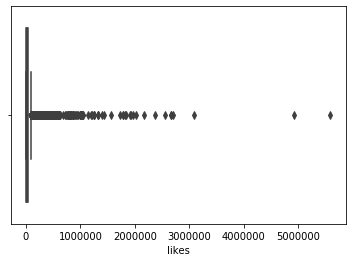

In [8]:
import seaborn as sns


new["views"] = pd.to_numeric(new.views, errors='coerce')
new["likes"] = pd.to_numeric(new.likes, errors='coerce')
new.dtypes
new["dislikes"] = pd.to_numeric(new.dislikes, errors='coerce')
new["comment_count"] = pd.to_numeric(new.comment_count, errors='coerce')
sns.boxplot(x=new['likes'])

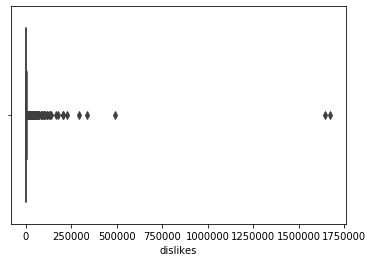

In [9]:
sns.boxplot(x=new['dislikes'])

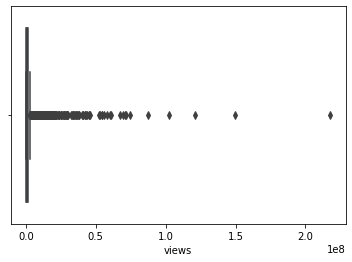

In [10]:
sns.boxplot(x=new['views'])

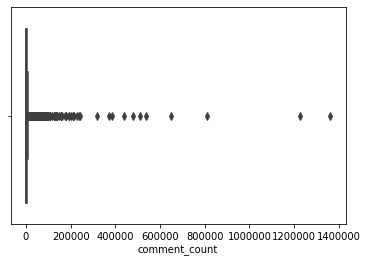

In [11]:
sns.boxplot(x=new['comment_count'])





Computing outliers

In [12]:
q = new["likes"].quantile(0.99)
outliers_like = new[new["likes"] > q]

In [13]:
q = new["dislikes"].quantile(0.99)
outliers_dislike= new[new["dislikes"] > q]

In [14]:
q = new["views"].quantile(0.99)
outliers_views= new[new["views"] > q]





In [15]:
q = new["comment_count"].quantile(0.99)
outliers_comment_count = new[new["comment_count"] > q]

Outlier Treatment


In [16]:
like_mean = new["likes"].mean()

df.replace(to_replace = outliers_like, 
                 value = like_mean) 

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,sec,count_word,count_word_tags,count_unique_word,count_unique_word_tags,count_tags,neutral,y_cat_1,y_cat_2,y_cat_3
0,10,9wRQljFNDW8,2017-11-14 00:00:00,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17.0,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655.0,...,26.0,16.0,8.0,15.0,8.0,49.0,80697.0,low,low,low
1,36,Om_zGhJLZ5U,2017-11-14 00:00:00,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1.0,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515.0,...,3.0,8.0,33.0,8.0,31.0,28.0,280615.0,medium,medium,medium
2,41,goP4Z5wyOlM,2017-11-14 00:00:00,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25.0,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308.0,...,40.0,10.0,6.0,10.0,6.0,10.0,34451.0,low,low,low
3,55,8NHA23f7LvU,2017-11-14 00:00:00,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24.0,2017-11-10 19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116.0,...,23.0,13.0,29.0,13.0,22.0,14.0,1479873.0,high,high,high
4,76,IE-xepGLVt8,2017-11-14 00:00:00,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28.0,2017-11-10 12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896.0,...,17.0,9.0,20.0,9.0,20.0,8.0,235337.0,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,40881,mHd8Ug4ljN4,2018-06-14 00:00:00,Broadway's 'Frozen' cast performs 'For the Fir...,Good Morning America,24.0,2018-05-30 13:55:16,"broadway|""frozen""|""cast""|""performs""|""for""|""the...",735189,13364.0,...,16.0,10.0,8.0,10.0,8.0,24.0,721337.0,medium,medium,medium
6435,40884,LU86T12xBQQ,2018-06-14 00:00:00,Artist Vs. Designer: DIY Prom Dress,As/Is,22.0,2018-05-30 22:00:25,"BuzzFeed|""As/Is""|""Prom Season""|""video""|""prom""|...",820885,21819.0,...,25.0,6.0,11.0,6.0,11.0,27.0,798603.0,medium,medium,medium
6436,40885,wI6a1t-M_48,2018-06-14 00:00:00,Yale Graduation Speaker Breaks Up with Boyfrie...,Ben Kronengold,22.0,2018-05-21 19:37:09,"commencement|""commencement speech""|""yale""|""yal...",2771306,81319.0,...,9.0,15.0,25.0,15.0,22.0,36.0,2685805.0,high,high,high
6437,40895,X9fHoWLf1w0,2018-06-14 00:00:00,The Best BBQ Meat | Great Taste,All Def Digital,24.0,2018-05-26 16:00:04,"The Best BBQ Meat|""barbecue""|""barbeque""|""doboy...",608459,21784.0,...,4.0,7.0,45.0,7.0,29.0,34.0,586500.0,medium,medium,medium


In [17]:
dislike_mean = new["dislikes"].mean()

df.replace(to_replace = outliers_dislike, 
                 value = dislike_mean) 

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,sec,count_word,count_word_tags,count_unique_word,count_unique_word_tags,count_tags,neutral,y_cat_1,y_cat_2,y_cat_3
0,10,9wRQljFNDW8,2017-11-14 00:00:00,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17.0,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655.0,...,26.0,16.0,8.0,15.0,8.0,49.0,80697.0,low,low,low
1,36,Om_zGhJLZ5U,2017-11-14 00:00:00,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1.0,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515.0,...,3.0,8.0,33.0,8.0,31.0,28.0,280615.0,medium,medium,medium
2,41,goP4Z5wyOlM,2017-11-14 00:00:00,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25.0,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308.0,...,40.0,10.0,6.0,10.0,6.0,10.0,34451.0,low,low,low
3,55,8NHA23f7LvU,2017-11-14 00:00:00,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24.0,2017-11-10 19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116.0,...,23.0,13.0,29.0,13.0,22.0,14.0,1479873.0,high,high,high
4,76,IE-xepGLVt8,2017-11-14 00:00:00,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28.0,2017-11-10 12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896.0,...,17.0,9.0,20.0,9.0,20.0,8.0,235337.0,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,40881,mHd8Ug4ljN4,2018-06-14 00:00:00,Broadway's 'Frozen' cast performs 'For the Fir...,Good Morning America,24.0,2018-05-30 13:55:16,"broadway|""frozen""|""cast""|""performs""|""for""|""the...",735189,13364.0,...,16.0,10.0,8.0,10.0,8.0,24.0,721337.0,medium,medium,medium
6435,40884,LU86T12xBQQ,2018-06-14 00:00:00,Artist Vs. Designer: DIY Prom Dress,As/Is,22.0,2018-05-30 22:00:25,"BuzzFeed|""As/Is""|""Prom Season""|""video""|""prom""|...",820885,21819.0,...,25.0,6.0,11.0,6.0,11.0,27.0,798603.0,medium,medium,medium
6436,40885,wI6a1t-M_48,2018-06-14 00:00:00,Yale Graduation Speaker Breaks Up with Boyfrie...,Ben Kronengold,22.0,2018-05-21 19:37:09,"commencement|""commencement speech""|""yale""|""yal...",2771306,81319.0,...,9.0,15.0,25.0,15.0,22.0,36.0,2685805.0,high,high,high
6437,40895,X9fHoWLf1w0,2018-06-14 00:00:00,The Best BBQ Meat | Great Taste,All Def Digital,24.0,2018-05-26 16:00:04,"The Best BBQ Meat|""barbecue""|""barbeque""|""doboy...",608459,21784.0,...,4.0,7.0,45.0,7.0,29.0,34.0,586500.0,medium,medium,medium


In [18]:
comment_count_mean = new["comment_count"].mean()

df.replace(to_replace = outliers_comment_count, 
                 value = comment_count_mean) 

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,sec,count_word,count_word_tags,count_unique_word,count_unique_word_tags,count_tags,neutral,y_cat_1,y_cat_2,y_cat_3
0,10,9wRQljFNDW8,2017-11-14 00:00:00,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17.0,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655.0,...,26.0,16.0,8.0,15.0,8.0,49.0,80697.0,low,low,low
1,36,Om_zGhJLZ5U,2017-11-14 00:00:00,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1.0,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515.0,...,3.0,8.0,33.0,8.0,31.0,28.0,280615.0,medium,medium,medium
2,41,goP4Z5wyOlM,2017-11-14 00:00:00,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25.0,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308.0,...,40.0,10.0,6.0,10.0,6.0,10.0,34451.0,low,low,low
3,55,8NHA23f7LvU,2017-11-14 00:00:00,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24.0,2017-11-10 19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116.0,...,23.0,13.0,29.0,13.0,22.0,14.0,1479873.0,high,high,high
4,76,IE-xepGLVt8,2017-11-14 00:00:00,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28.0,2017-11-10 12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896.0,...,17.0,9.0,20.0,9.0,20.0,8.0,235337.0,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,40881,mHd8Ug4ljN4,2018-06-14 00:00:00,Broadway's 'Frozen' cast performs 'For the Fir...,Good Morning America,24.0,2018-05-30 13:55:16,"broadway|""frozen""|""cast""|""performs""|""for""|""the...",735189,13364.0,...,16.0,10.0,8.0,10.0,8.0,24.0,721337.0,medium,medium,medium
6435,40884,LU86T12xBQQ,2018-06-14 00:00:00,Artist Vs. Designer: DIY Prom Dress,As/Is,22.0,2018-05-30 22:00:25,"BuzzFeed|""As/Is""|""Prom Season""|""video""|""prom""|...",820885,21819.0,...,25.0,6.0,11.0,6.0,11.0,27.0,798603.0,medium,medium,medium
6436,40885,wI6a1t-M_48,2018-06-14 00:00:00,Yale Graduation Speaker Breaks Up with Boyfrie...,Ben Kronengold,22.0,2018-05-21 19:37:09,"commencement|""commencement speech""|""yale""|""yal...",2771306,81319.0,...,9.0,15.0,25.0,15.0,22.0,36.0,2685805.0,high,high,high
6437,40895,X9fHoWLf1w0,2018-06-14 00:00:00,The Best BBQ Meat | Great Taste,All Def Digital,24.0,2018-05-26 16:00:04,"The Best BBQ Meat|""barbecue""|""barbeque""|""doboy...",608459,21784.0,...,4.0,7.0,45.0,7.0,29.0,34.0,586500.0,medium,medium,medium


In [19]:
views_mean = new["views"].mean()

df.replace(to_replace = outliers_views, 
                 value = views_mean) 


,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,sec,count_word,count_word_tags,count_unique_word,count_unique_word_tags,count_tags,neutral,y_cat_1,y_cat_2,y_cat_3
0,10,9wRQljFNDW8,2017-11-14 00:00:00,Dion Lewis' 103-Yd Kick Return TD vs. Denver! ...,NFL,17.0,2017-11-13 02:05:26,"NFL|""Football""|""offense""|""defense""|""afc""|""nfc""...",81377,655.0,...,26.0,16.0,8.0,15.0,8.0,49.0,80697.0,low,low,low
1,36,Om_zGhJLZ5U,2017-11-14 00:00:00,TL;DW - Every DCEU Movie Before Justice League,Screen Junkies,1.0,2017-11-12 18:00:03,"screenjunkies|""screen junkies""|""sj news""|""hone...",288922,7515.0,...,3.0,8.0,33.0,8.0,31.0,28.0,280615.0,medium,medium,medium
2,41,goP4Z5wyOlM,2017-11-14 00:00:00,Iraq-Iran earthquake: Deadly tremor hits borde...,BBC News,25.0,2017-11-12 21:16:40,"bbc|""bbc news""|""news""|""iran""|""iran news""|""iraq...",34785,308.0,...,40.0,10.0,6.0,10.0,6.0,10.0,34451.0,low,low,low
3,55,8NHA23f7LvU,2017-11-14 00:00:00,Jason Momoa Wows Hugh Grant With Some Dothraki...,The Graham Norton Show,24.0,2017-11-10 19:06:23,"Graham Norton|""Graham Norton Show Official""|""E...",1496225,16116.0,...,23.0,13.0,29.0,13.0,22.0,14.0,1479873.0,high,high,high
4,76,IE-xepGLVt8,2017-11-14 00:00:00,Mayo Clinic's first face transplant patient me...,Mayo Clinic,28.0,2017-11-10 12:04:17,"Mayo Clinic|""Health Care (Issue)""|""Healthcare ...",237307,1896.0,...,17.0,9.0,20.0,9.0,20.0,8.0,235337.0,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6434,40881,mHd8Ug4ljN4,2018-06-14 00:00:00,Broadway's 'Frozen' cast performs 'For the Fir...,Good Morning America,24.0,2018-05-30 13:55:16,"broadway|""frozen""|""cast""|""performs""|""for""|""the...",735189,13364.0,...,16.0,10.0,8.0,10.0,8.0,24.0,721337.0,medium,medium,medium
6435,40884,LU86T12xBQQ,2018-06-14 00:00:00,Artist Vs. Designer: DIY Prom Dress,As/Is,22.0,2018-05-30 22:00:25,"BuzzFeed|""As/Is""|""Prom Season""|""video""|""prom""|...",820885,21819.0,...,25.0,6.0,11.0,6.0,11.0,27.0,798603.0,medium,medium,medium
6436,40885,wI6a1t-M_48,2018-06-14 00:00:00,Yale Graduation Speaker Breaks Up with Boyfrie...,Ben Kronengold,22.0,2018-05-21 19:37:09,"commencement|""commencement speech""|""yale""|""yal...",2771306,81319.0,...,9.0,15.0,25.0,15.0,22.0,36.0,2685805.0,high,high,high
6437,40895,X9fHoWLf1w0,2018-06-14 00:00:00,The Best BBQ Meat | Great Taste,All Def Digital,24.0,2018-05-26 16:00:04,"The Best BBQ Meat|""barbecue""|""barbeque""|""doboy...",608459,21784.0,...,4.0,7.0,45.0,7.0,29.0,34.0,586500.0,medium,medium,medium
